<a href="https://colab.research.google.com/github/AshwinUnnikrishnan/WeatherPrediction/blob/main/Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Weather Prediction**

The Data is collected from National Centers for Environmental Information

### Importing Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Projects/BostonWeatherPrediction/

Mounted at /content/drive


In [9]:
import pandas as pd

In [10]:
weather = pd.read_csv("BostonWeather.csv", index_col="DATE")

In [11]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,FRGT,PGTM,PRCP,PSUN,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00014739,"BOSTON, MA US",NaN,NaN,NaN,NaN,NaN,712.0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00014739,"BOSTON, MA US",NaN,NaN,NaN,NaN,NaN,1618.0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-03,USW00014739,"BOSTON, MA US",NaN,NaN,NaN,NaN,NaN,1000.0,0.92,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00014739,"BOSTON, MA US",NaN,NaN,NaN,NaN,NaN,936.0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00014739,"BOSTON, MA US",NaN,NaN,NaN,NaN,NaN,1412.0,0.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22829 entries, 1960-01-01 to 2022-07-02
Data columns (total 47 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  22829 non-null  object 
 1   NAME     22829 non-null  object 
 2   ACMH     11410 non-null  float64
 3   ACSH     11413 non-null  float64
 4   AWND     14061 non-null  float64
 5   FMTM     10144 non-null  float64
 6   FRGT     1 non-null      float64
 7   PGTM     17818 non-null  float64
 8   PRCP     22826 non-null  float64
 9   PSUN     6937 non-null   float64
 10  SNOW     22826 non-null  float64
 11  SNWD     15360 non-null  float64
 12  TAVG     6049 non-null   float64
 13  TMAX     22828 non-null  float64
 14  TMIN     22828 non-null  float64
 15  TSUN     11746 non-null  float64
 16  WDF1     3588 non-null   float64
 17  WDF2     9584 non-null   float64
 18  WDF5     9562 non-null   float64
 19  WDFG     12886 non-null  float64
 20  WDFM     7798 non-null   float64
 21  WES

## Data Preparation

### Fixing Missing Values

Finding the values 

In [14]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.500197
ACSH       0.500066
AWND       0.384073
FMTM       0.555653
FRGT       0.999956
PGTM       0.219502
PRCP       0.000131
PSUN       0.696132
SNOW       0.000131
SNWD       0.327172
TAVG       0.735030
TMAX       0.000044
TMIN       0.000044
TSUN       0.485479
WDF1       0.842831
WDF2       0.580183
WDF5       0.581147
WDFG       0.435543
WDFM       0.658417
WESD       0.700337
WSF1       0.842831
WSF2       0.580183
WSF5       0.581147
WSFG       0.435061
WSFM       0.658417
WT01       0.618906
WT02       0.947260
WT03       0.953874
WT04       0.978010
WT05       0.982128
WT06       0.987078
WT07       0.997284
WT08       0.815410
WT09       0.990276
WT10       0.999956
WT11       0.999168
WT13       0.897981
WT14       0.945771
WT15       0.996978
WT16       0.636603
WT17       0.996846
WT18       0.893688
WT19       0.998335
WT21       0.999912
WT22       0.995970
dtype: float64

Taking the columns required by the project for now

In [16]:
core_weather = weather[["PRCP", "SNOW","SNWD","TMAX","TMIN"]].copy()

Renaming Columns

In [17]:
core_weather.columns = ["precip","snow","snow_depth","temp_max", "temp_min"]

In [18]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1960-01-01,0.00,0.0,0.0,37.0,24.0
1960-01-02,0.00,0.0,0.0,47.0,23.0
1960-01-03,0.92,0.0,0.0,57.0,37.0
1960-01-04,0.00,0.0,0.0,41.0,33.0
1960-01-05,0.00,0.0,0.0,37.0,27.0
...,...,...,...,...,...
2022-06-28,0.00,0.0,NaN,76.0,62.0
2022-06-29,0.00,0.0,NaN,83.0,63.0
2022-06-30,0.00,0.0,NaN,83.0,67.0


Filling Missing Values and removing the null values

In [27]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip        0.0
snow          0.0
snow_depth    0.0
temp_max      0.0
temp_min      0.0
dtype: float64

In [20]:
core_weather["snow"].value_counts()

0.0     21383
0.1       174
0.2       131
0.3       121
0.4        77
        ...  
7.7         1
8.1         1
22.4        1
7.5         1
11.7        1
Name: snow, Length: 128, dtype: int64

In [21]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
2003-08-23,NaN,0.0,0.0,84.0,65.0
2003-08-24,NaN,0.0,0.0,76.0,60.0
2022-07-02,NaN,NaN,NaN,NaN,NaN


In [22]:
core_weather["precip"].value_counts()

0.00    14936
0.01      838
0.02      465
0.03      379
0.04      322
        ...  
3.31        1
3.36        1
6.11        1
2.28        1
2.54        1
Name: precip, Length: 271, dtype: int64

In [23]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [26]:
core_weather[pd.isnull(core_weather["temp_max"])]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,


In [25]:
core_weather = core_weather.fillna(method='ffill')

Checking the data type

In [28]:
core_weather.dtypes

precip        float64
snow          float64
snow_depth    float64
temp_max      float64
temp_min      float64
dtype: object

In [29]:
core_weather.index = pd.to_datetime(core_weather.index)

In [30]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-06-23', '2022-06-24', '2022-06-25', '2022-06-26',
               '2022-06-27', '2022-06-28', '2022-06-29', '2022-06-30',
               '2022-07-01', '2022-07-02'],
              dtype='datetime64[ns]', name='DATE', length=22829, freq=None)

In [31]:
core_weather.apply(lambda x: (x==9999).sum())

precip        0
snow          0
snow_depth    0
temp_max      0
temp_min      0
dtype: int64

### Anlalyzing the Data

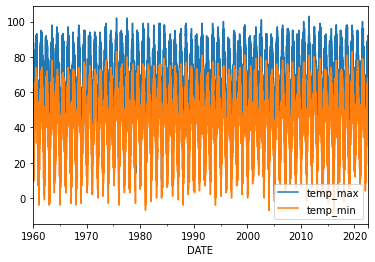

In [32]:
core_weather[["temp_max", "temp_min"]].plot()

In [33]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
       ... 
2018    365
2019    365
2020    366
2021    365
2022    183
Name: DATE, Length: 63, dtype: int64

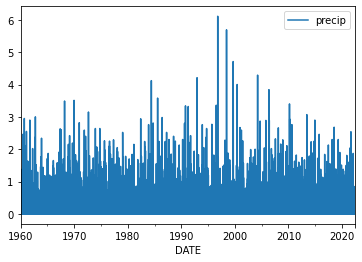

In [34]:
core_weather[["precip"]].plot()

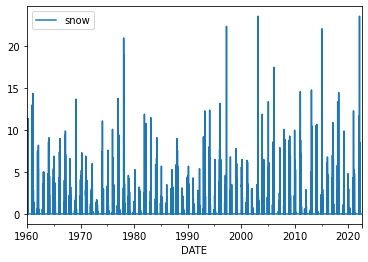

In [35]:
core_weather[["snow"]].plot()

Getting how much it rained or snowed each year

In [36]:
core_weather.groupby(core_weather.index.year).sum()["precip"]

DATE
1960    44.46
1961    47.84
1962    43.23
1963    34.84
1964    36.47
        ...  
2018    53.32
2019    50.38
2020    37.54
2021    52.33
2022    15.84
Name: precip, Length: 63, dtype: float64

In [37]:
core_weather.groupby(core_weather.index.year).sum()["snow"]

DATE
1960    51.7
1961    56.9
1962    38.6
1963    42.4
1964    57.5
        ... 
2018    50.9
2019    38.7
2020    21.6
2021    21.7
2022    53.6
Name: snow, Length: 63, dtype: float64

## Training the Machine Learning Model

Trying to predict models maximum temp

In [40]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [41]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1960-01-01,0.00,0.0,0.0,37.0,24.0,47.0
1960-01-02,0.00,0.0,0.0,47.0,23.0,57.0
1960-01-03,0.92,0.0,0.0,57.0,37.0,41.0
1960-01-04,0.00,0.0,0.0,41.0,33.0,37.0
1960-01-05,0.00,0.0,0.0,37.0,27.0,36.0
...,...,...,...,...,...,...
2022-06-28,0.00,0.0,0.0,76.0,62.0,83.0
2022-06-29,0.00,0.0,0.0,83.0,63.0,83.0
2022-06-30,0.00,0.0,0.0,83.0,67.0,92.0


In [42]:
core_weather = core_weather.iloc[:-1,:].copy()

In [43]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1960-01-01,0.00,0.0,0.0,37.0,24.0,47.0
1960-01-02,0.00,0.0,0.0,47.0,23.0,57.0
1960-01-03,0.92,0.0,0.0,57.0,37.0,41.0
1960-01-04,0.00,0.0,0.0,41.0,33.0,37.0
1960-01-05,0.00,0.0,0.0,37.0,27.0,36.0
...,...,...,...,...,...,...
2022-06-27,0.65,0.0,0.0,77.0,67.0,76.0
2022-06-28,0.00,0.0,0.0,76.0,62.0,83.0
2022-06-29,0.00,0.0,0.0,83.0,63.0,83.0


### Ridge Regression

In [44]:
from sklearn.linear_model import Ridge

In [51]:
reg = Ridge(alpha=0.1)

In [46]:
predictors = ["precip","snow","snow_depth","temp_max","temp_min"]

In [52]:
train = core_weather.loc[:"2020-12-31"]

In [53]:
test = core_weather.loc["2021-01-01":]

In [54]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [55]:
predictions = reg.predict(test[predictors])

In [57]:
from sklearn.metrics import mean_absolute_error

In [58]:
mean_absolute_error(test["target"], predictions)

6.5914843165883

In [59]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [60]:
combined

,actual,predictions
DATE,,
2021-01-01,42.0,41.225957
2021-01-02,36.0,44.607335
2021-01-03,39.0,41.360923
2021-01-04,33.0,43.854496
2021-01-05,40.0,40.654925
...,...,...
2022-06-27,76.0,77.559548
2022-06-28,83.0,76.262813
2022-06-29,83.0,79.878380


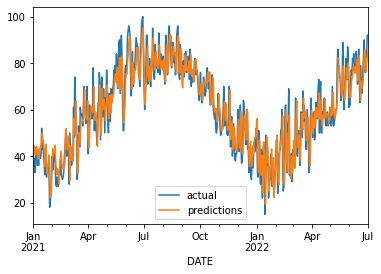

In [61]:
combined.plot()

In [62]:
reg.coef_

array([-2.66387339, -0.25752216, -0.01013276,  0.44263477,  0.51712357])

In [103]:
def create_predictions(predictors, core_weather, reg):
  train = core_weather.loc[:"2020-12-31"]
  test = core_weather.loc["2021-01-01":]
  reg.fit(train[predictors], train["target"])
  predictions = reg.predict(test[predictors])
  error = mean_absolute_error(test["target"], predictions)
  combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
  combined.columns = ["actual", "predictions"]
  return error, combined

In [64]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [65]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target,month_max
DATE,,,,,,,
1960-01-01,0.00,0.0,0.0,37.0,24.0,47.0,NaN
1960-01-02,0.00,0.0,0.0,47.0,23.0,57.0,NaN
1960-01-03,0.92,0.0,0.0,57.0,37.0,41.0,NaN
1960-01-04,0.00,0.0,0.0,41.0,33.0,37.0,NaN
1960-01-05,0.00,0.0,0.0,37.0,27.0,36.0,NaN
...,...,...,...,...,...,...,...
2022-06-27,0.65,0.0,0.0,77.0,67.0,76.0,76.233333
2022-06-28,0.00,0.0,0.0,76.0,62.0,83.0,76.333333
2022-06-29,0.00,0.0,0.0,83.0,63.0,83.0,76.200000


In [96]:
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]
#core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [94]:
predictors = ["precip","snow","snow_depth","temp_max","temp_min", "month_max", "month_day_max"]#, "max_min"]

In [68]:
core_weather = core_weather.iloc[30:,:].copy()

In [71]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target,month_max,month_day_max,max_min
DATE,,,,,,,,,
1960-01-31,0.00,0.0,0.0,33.0,24.0,34.0,37.066667,1.123232,1.375000
1960-02-01,0.00,0.0,0.0,34.0,27.0,30.0,36.633333,1.077451,1.259259
1960-02-02,0.03,0.2,0.0,30.0,26.0,42.0,35.733333,1.191111,1.153846
1960-02-03,0.03,0.7,1.0,42.0,25.0,53.0,35.766667,0.851587,1.680000
1960-02-04,0.00,0.0,0.0,53.0,29.0,42.0,36.300000,0.684906,1.827586
...,...,...,...,...,...,...,...,...,...
2022-06-27,0.65,0.0,0.0,77.0,67.0,76.0,76.233333,0.990043,1.149254
2022-06-28,0.00,0.0,0.0,76.0,62.0,83.0,76.333333,1.004386,1.225806
2022-06-29,0.00,0.0,0.0,83.0,63.0,83.0,76.200000,0.918072,1.317460


In [73]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

precip           0.0
snow             0.0
snow_depth       0.0
temp_max         0.0
temp_min         0.0
target           0.0
month_max        0.0
month_day_max    0.0
max_min          0.0
dtype: float64

In [97]:
core_weather_temp = core_weather.copy()

In [100]:
core_weather_temp.apply(pd.isnull).sum()/core_weather_temp.shape[0]

precip           0.0
snow             0.0
snow_depth       0.0
temp_max         0.0
temp_min         0.0
target           0.0
month_max        0.0
month_day_max    0.0
max_min          0.0
dtype: float64

In [104]:
error, combined = create_predictions(predictors, core_weather_temp, reg)

In [105]:
error

6.395222468706421